## The Machine Learning Process:-

Credit to: `Jason Brownlee`

Instructor: `Ainembabazi Moses`

Prerequisite: Numpy, Pandas, Matplotlib

Duration: 3Hrs

## Dimensions of Your Data
You must have a very good handle on how much data you have, both in terms of rows and columns.

- `Data Integrity:` The first and foremost reason for checking the dimensions of data is to ensure that the data is complete and accurate. The shape of the data (number of rows and columns) can give an idea of how much data is available for analysis, and can help detect any inconsistencies or missing values in the data.

- `Data Preprocessing:` The dimensions of data are important to determine the appropriate preprocessing steps to apply before building a machine learning model. For example, if there are too many missing values or too few data points, certain data cleaning or feature engineering techniques may need to be applied to prepare the data for analysis.

- `Model Training:` The dimensions of data also impact the training of machine learning models. Machine learning models require a certain amount of data to learn and generalize patterns in the data. If the dataset is too small, the model may not learn the underlying patterns in the data, and if the dataset is too large, it may lead to overfitting. Thus, understanding the dimensions of the data is crucial for selecting an appropriate model and tuning its hyperparameters.


- `Training time estimation:`  the dimensions of data can have a significant impact on the training times of machine learning models. In general, as the size of the dataset (i.e., number of rows and columns) increases, the training time of machine learning models also increases.
This is because most machine learning algorithms require multiple passes over the data to learn the underlying patterns and relationships in the data. As the dataset size increases, the number of calculations required to process the data increases, which can result in longer training times.

Dataset Shape: (768, 9)

Data Types:
 Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

Descriptive Statistics:
        Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.

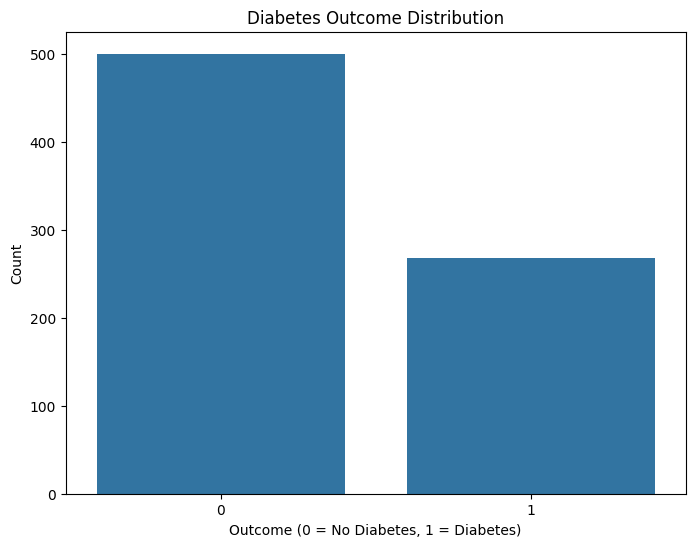

Cleaned dataset saved as 'diabetes_cleaned.csv'


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('diabetes.csv')

# Check dimensions and data types
print("Dataset Shape:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nDescriptive Statistics:\n", df.describe())

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Replace zero values in physiological columns with median of non-zero values
physiological_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in physiological_cols:
    zero_count = (df[col] == 0).sum()
    if zero_count > 0:
        print(f"Column '{col}' has {zero_count} zero values.")
        median_non_zero = df[df[col] != 0][col].median()
        df.loc[df[col] == 0, col] = median_non_zero
        print(f"Replaced zeros in '{col}' with median: {median_non_zero}")

# Visualize Outcome distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Outcome', data=df)
plt.title('Diabetes Outcome Distribution')
plt.xlabel('Outcome (0 = No Diabetes, 1 = Diabetes)')
plt.ylabel('Count')
plt.show()

# Save cleaned dataset
df.to_csv('diabetes_cleaned.csv', index=False)
print("Cleaned dataset saved as 'diabetes_cleaned.csv'")

## Data Types

It is important to know your data types for a couple of reasons:-

- `Data consistency:` Checking the data types ensures that the data is consistent and in the correct format. Inconsistent data types can lead to errors or incorrect predictions during model training and testing. For example, when you keep the dates they should be in one format such as "mm/dd/yyyy" if they shift around you will have errors in analysis

- `Feature engineering:` Data types can determine how features are engineered for the model. For example, categorical data requires different feature engineering methods than numerical data. You will be able to plan properly

- `Memory optimization:` Checking data types can help optimize memory usage during preprocessing, especially when dealing with large datasets. Data types can be converted to lower memory-consuming types like integers or floats.

- `Efficient data manipulation`: Different data types can require different manipulation techniques, and knowing the data types beforehand can save time and improve efficiency during data manipulation.

- `Model performance:` Checking the data types can help to identify potential issues that can affect model performance, such as non-numeric data types that require encoding or missing values that require imputation.

# Descriptive Statistics

There are several important reasons why you would want to check the descriptive statistics of your data in a machine learning experiment. Here are some of the key reasons:

- `Identifying missing or erroneous data:` Descriptive statistics can help you identify if any of your data is missing or if there are any errors in your dataset. For example, you may notice that certain features have a lower count of non-null values than others, which could indicate missing data.

- `Understanding the distribution of your data:` Descriptive statistics can give you insights into the distribution of your data, such as the mean, median, and mode. This information can be useful for choosing the appropriate machine learning algorithms, as some algorithms work better with certain types of data distributions.

- `Detecting outliers:` Descriptive statistics can also help you detect outliers, which are data points that fall outside the expected range of values. Outliers can have a significant impact on your machine learning model's performance, so it's important to identify and handle them appropriately.

- `Assessing the quality of your data:` By examining the descriptive statistics of your data, you can get a sense of the overall quality of your dataset. For example, if you notice that some features have a large range of values compared to others, this could indicate that the data is noisy or that some features may be more important than others.

- Descriptive statistics `can give you great insight into the shape of each attribute`. Often you can create more summaries than you have time to review. The describe() function on the Pandas

DataFrame lists 8 statistical properties of each attribute. They are:

- Count.
- Mean.
- Standard Deviation.
- Minimum Value.
- 25th Percentile.
- 50th Percentile (Median).
- 75th Percentile.
- Maximum Value.


## Pandas Profiling

- This can be made easier using a library called pandasprofiling, this library helps you draw all the graphs but you will still have to make decisions on those graphs to move forward.


# Homework:
>> Does it make sense to have BloodPressure of 0 in a person as you see in the data.describe below? How would you handle it?
What methods would you use?

- Install pandasprofiling
- Use it to create an EDA (Exploratory Data Analysis Report)
- Find a way to replace the data that is 0.00 (and doesnt make sense : mean : numpy, find all 0.0 values and replace them)
- Clean your data.

>> Does it make sense to have BloodPressure of 0 in a person as you see in the data.describe below? How would you handle it?
What methods would you use?

>>>> It is highly unlikely and biologically impossible for a person to have a blood pressure of 0. Therefore, having a BloodPressure value of 0 in a given dataset is most likely a result of missing or incorrect data.

>>>> To handle this issue, we can replace the 0 values with an appropriate value, such as the mean or median of the non-zero values. This approach assumes that the missing or incorrect values are randomly distributed and not biased towards any specific group or subgroup in the dataset.
>>>> After replacing the 0 values with an appropriate value, it is important to perform data validation and sanity checks to ensure the data is reasonable and consistent with domain knowledge. Additionally, it is recommended to perform exploratory data analysis and visualization to identify any other potential issues with the data.

>>>> To handle the issue of BloodPressure values being 0 in a given dataset, we can use the following methods:
- Identify the rows where the BloodPressure value is 0 using boolean indexing in pandas.
- Replace the 0 values with an appropriate value, such as the mean or median of non-zero BloodPressure values.
- Perform data validation and sanity checks to ensure the data is reasonable and consistent with domain knowledge.
- Perform exploratory data analysis and visualization to identify any other potential issues with the data.












Install pandasprofiling
- Use it to create an EDA (Exploratory Data Analysis Report)
- Find a way to replace the data that is 0.00 (and doesnt make sense : mean : numpy, find all 0.0 values and replace them)
- Clean your data.

## Label Distribution (Classiffication Only)

Why would someone check the label distribution in an ML/AI experiment?

- `Class imbalance:` In some datasets, one class may be significantly more prevalent than the others. This can lead to a class imbalance problem, where the model is biased towards the majority class and performs poorly on the minority class. Checking the label distribution can help identify if there is a class imbalance problem in the data.

- `Model performance:` The label distribution can impact the model's performance. If the model is trained on a dataset with a skewed label distribution, it may not generalize well to unseen data. Checking the label distribution can help ensure that the model is trained on a representative sample of the data.

- `Data preprocessing:` Depending on the label distribution, different preprocessing techniques may be needed. For example, in a dataset with imbalanced labels, oversampling or undersampling techniques may be needed to balance the classes. Checking the label distribution can help determine what preprocessing techniques are needed.

- `Data collection:` The label distribution can provide insights into the data collection process. For example, if a certain label is overrepresented, it may indicate that the data was collected in a biased way. Checking the label distribution can help identify potential biases in the data collection process.

- `Domain knowledge:` Checking the label distribution can help provide insights into the problem domain. For example, if a certain label is underrepresented, it may indicate that the problem is rare or difficult to identify. Checking the label distribution can help the modeler understand the problem domain better.

## Correlation

Correlation refers to the relationship between two variables and how they may or may not change together. The most common method for calculating correlation is Pearson's Correlation Coefficient, that assumes a normal distribution of the attributes involved.

`A correlation of -1 or 1 shows a full negative or positive correlation respectively.`

Whereas a value of 0 shows no correlation at all. Some machine learning algorithms like linear and logistic regression can suffer poor performance if there are highly correlated attributes in your dataset. `It is important to know the assumptions of the model you are using before using it`

---

### Model Assumptions:

The supporting reasons for checking the assumptions of a model in an ML experiment, and how it affects how you handle data in the case of a linear regression model.

- `Ensures validity of results:` Checking the assumptions of a linear regression model ensures the validity of the results. If the assumptions are not met, the results obtained from the model may not be reliable or valid. For example, if the assumption of linearity is not met, the results obtained from the model may not accurately reflect the relationship between the dependent and independent variables.

- `Helps in selecting appropriate variables:` Checking the assumptions of a linear regression model helps in selecting appropriate variables for the model. For example, if the assumption of normality is not met, it may indicate that some variables may not be appropriate for the model or may need to be transformed.

- `Improves model accuracy:` Checking the assumptions of a linear regression model can help in improving the accuracy of the model. For example, if the assumption of homoscedasticity is not met, it may indicate that the model needs to be transformed or that a different model may be more appropriate.

- `Guides data preparation:` Checking the assumptions of a linear regression model guides data preparation. For example, if the assumption of independence is not met, it may indicate that the data needs to be collected differently or that some observations need to be excluded from the analysis.

- `Provides insights into underlying data:` Checking the assumptions of a linear regression model provides insights into the underlying data. For example, if the assumption of normality is not met, it may indicate that there are outliers or that the data is skewed.

#### `Comparison of Assumptions between Linear Regression and Logistic Regression`
---

`Assumptions of Linear Regression Model:`

- Linearity: The relationship between the dependent variable and independent variable is linear.
- Independence: The observations are independent of each other.
- Homoscedasticity: The variance of the errors is constant across all levels of the independent variable.
- Normality: The errors follow a normal distribution.
- No multicollinearity: There is no high correlation among the independent variables.

`Assumptions of Logistic Regression Model:`

- Linearity of the logit: The relationship between the independent variable and the logit of the dependent variable is linear.
- Independence: The observations are independent of each other.
- No multicollinearity: There is no high correlation among the independent variables.
- Large sample size: There are a sufficient number of observations for each combination of the independent variables.
- No outliers: There are no extreme observations that can influence the results.

---

As such, it is a good idea to review all of the pairwise correlations of the attributes in your dataset. You can use the corr() function on the Pandas DataFrame to calculate a correlation matrix.

There are several reasons why one would consider the correlation between variables while doing machine learning:

- `Identify redundant features:` Correlated features can be redundant and provide similar information. Including highly correlated features in a model can lead to overfitting and decrease the model's performance. Identifying and removing these features can help reduce the complexity of the model and improve its accuracy.

>> Suppose you are building a model to predict the price of a house based on its size, number of bedrooms, number of bathrooms, and location. The number of bedrooms and number of bathrooms are highly correlated, and including both features in the model can lead to overfitting. By identifying the correlation between these two features and removing one of them, we can reduce the complexity of the model.

- `Improve model interpretability:` Understanding the correlation between variables can help to explain the relationships between the features and the target variable. This understanding can improve the interpretability of the model and help to identify important features that contribute most to the prediction.

>> Consider a model that predicts whether a customer will buy a product based on their age, income, and education level. By analyzing the correlation between these features and the target variable, we can determine that income has the strongest correlation with the target variable. This understanding can help to explain why income is a critical factor in determining whether a customer buys a product, and improve the interpretability of the model.

- `Data preprocessing:` Correlation analysis can be used to identify and remove outliers and missing values in the dataset. This process can help to improve the quality of the data and the model's performance.

>> Suppose you are building a model to predict the likelihood of a customer to churn (i.e., leave) a subscription-based service. The dataset includes missing values and outliers, which can affect the quality of the data and the model's performance. By analyzing the correlation between the features and the target variable, we can identify and remove outliers and fill in missing values, which can help to improve the quality of the data and the model's performance.

- `Feature engineering:` Correlation analysis can help in creating new features that can improve the model's performance. For example, we can create a new feature by combining highly correlated features or by performing operations on correlated features to create a new feature that is more predictive.

>> Consider a model that predicts whether a student will pass a test based on their study hours, attendance rate, and average grade. By analyzing the correlation between these features, we can create a new feature by multiplying the study hours and attendance rate, which are highly correlated. This new feature can be more predictive than either feature alone, and can help to improve the model's performance.

### Note: Feature and Label Correlation
`Feature selection:` Correlation analysis can help identify which variables are strongly correlated with the label and, therefore, are potentially good features for use in the model. Feature selection is important to prevent overfitting and improve the accuracy of the model.

# Prepare Your Data For Machine Learning

Many machine learning algorithms make assumptions about your data. It is often a very good
idea to prepare your data in such way to best expose the structure of the problem to the machine
learning algorithms that you intend to use. In this chapter you will discover how to prepare
your data for machine learning in Python using scikit-learn. After completing this lesson you
will know how to:

1. Rescale data.
2. Standardize data.
3. Normalize data.
4. Binarize data.


### Need For Data Pre-processing
You almost always need to pre-process your data. It is a required step. A difficulty is that
different algorithms make different assumptions about your data and may require different
transforms. Further, when you follow all of the rules and prepare your data, sometimes algorithms
can deliver better results without pre-processing.
Generally, I would recommend creating many different views and transforms of your data,
then exercise a handful of algorithms on each view of your dataset. This will help you to
ush
out which data transforms might be better at exposing the structure of your problem in general.

The steps involved are as below:

- Split the dataset into the input and output variables for machine learning.
- Apply a pre-processing transform to the input variables.
- Summarize the data to show the change.

The scikit-learn library provides two standard idioms for transforming data. Each are useful
in different circumstances. The transforms are calculated in such a way that they can be applied
to your training data and any samples of data you may have in the future. The scikit-learn
documentation has some information on how to use various different pre-processing methods:

The Fit and Multiple Transform method is the preferred approach. You call the fit()
function to prepare the parameters of the transform once on your data. Then later you can use
the transform() function on the same data to prepare it for modeling and again on the test or
validation dataset or new data that you may see in the future. The Combined Fit-And-Transform
is a convenience that you can use for one of the tasks. This might be useful if you are interested
in plotting or summarizing the transformed data.


## Rescale Data

In machine learning, `rescaling refers to the process of transforming the values of a variable to a new scale`, typically to a specific range or distribution. Rescaling is often used as a data preprocessing step to prepare the data for use in a machine learning model.

Rescaling can be achieved using various techniques, including normalization and standardization, as well as other methods such as `min-max scaling` and `log transformation`. The choice of rescaling technique depends on the nature of the data and the specific requirements of the model.

Rescaling is important in machine learning because it can help to improve the performance of the model by reducing the impact of features that have large values or different scales. Rescaling can also help to simplify the interpretation of the model by making the features more comparable and understandable.

- `Avoiding numerical instability:` In some machine learning algorithms, such as gradient-based optimization algorithms, the scale of the input features can affect the convergence of the algorithm. Rescaling the data can help avoid numerical instability and improve the convergence of the algorithm.

- `Improving performance:` Rescaling the data can improve the performance of the model, especially when using distance-based algorithms or when the features have different scales. In distance-based algorithms, the distance between two data points is affected by the scale of the features, so rescaling the data can make the distance more meaningful. Similarly, when the features have different scales, rescaling can help give equal importance to all features.

- `Reducing computational complexity:` Rescaling the data can reduce the computational complexity of some machine learning algorithms, such as support vector machines. When the features have different scales, some algorithms may require more computation to converge, and rescaling can help reduce this complexity.

- `Normalization:` As mentioned in the previous answer, rescaling can be used for normalization, which is a technique used to rescale data to a specific range, typically between 0 and 1. Normalization can help in comparing variables that have different units or scales or when we want to give more importance to small values.


## Standardize Data
Standardization is a useful technique to transform attributes with a Gaussian distribution and
differing means and standard deviations to a standard Gaussian distribution with a mean of
0 and a standard deviation of 1.

`Standardization`, also known as `z-score normalization`, is a technique used to `transform data so that it has zero mean and unit variance`. This is achieved by `subtracting the mean of the data and dividing by its standard deviation.` The resulting transformed data has `a mean of 0` and a `standard deviation of 1`. Standardization is often used when the distribution of the data is approximately normal or when we want to give equal importance to all features.

__`It is most suitable for techniques that assume a Gaussian distribution in the input variables and work better with rescaled data, such as linear regression, logistic regression and linear discriminate analysis.`__

Example in Skearn

## Normalize Data
Normalizing in scikit-learn refers to rescaling each observation (row) to have a length of 1 (called
a unit norm or a vector with the length of 1 in linear algebra).

`Normalization`, on the other hand, is `a technique used to rescale data to a specific range, typically between 0 and 1.` This is achieved by `subtracting the minimum value of the data and dividing by the range` (i.e., the difference between the maximum and minimum values). Normalization is often used when we want to compare variables that have different units or scales or when we want to give more importance to small values.

__`This pre-processing method can be useful for sparse datasets (lots of zeros) with attributes of varying scales when using algorithms that weight input values such as neural networks and algorithms that use distance measures such as k-Nearest Neighbors.`__

Example in Skearn

In [8]:
import pandas as pd
from ydata_profiling import ProfileReport
import numpy as np

In [4]:
!pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 22.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 31.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 3.1 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=6c361f17bac3fdc26119a9d2bdb19319fe2b846dfd0c8fd78fe269251dd54ff2
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


In [6]:
df = pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [9]:
profile = ProfileReport(df, title = "diabetes profile report")
profile

Output hidden; open in https://colab.research.google.com to view.

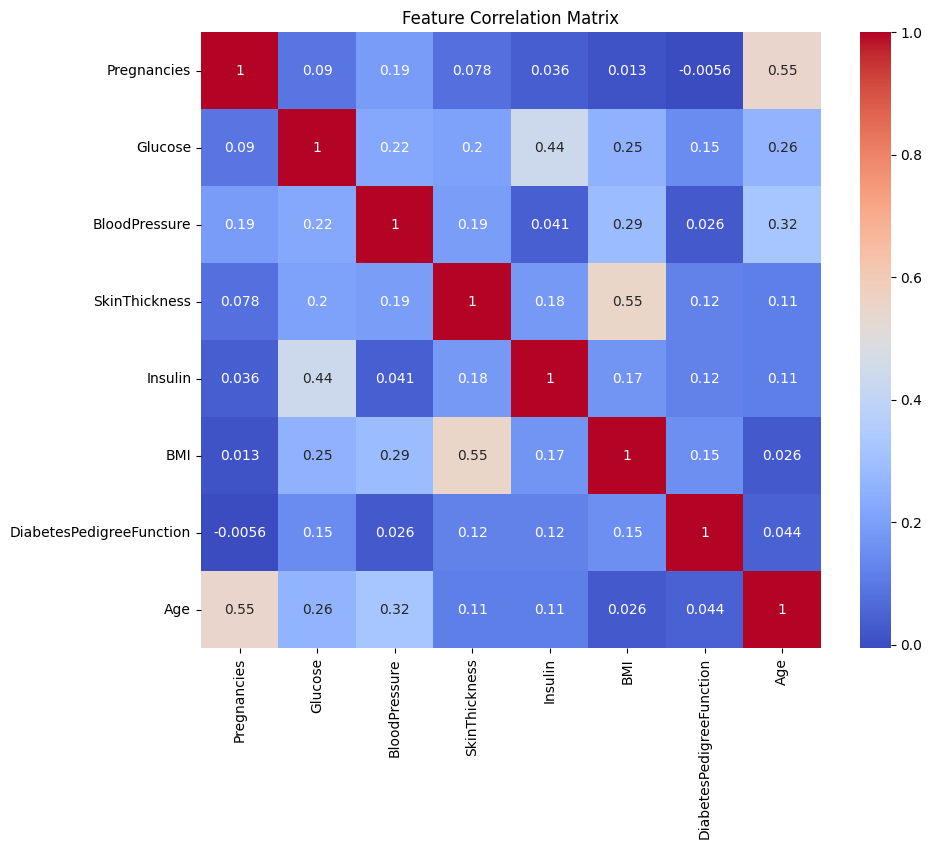

Transformed dataset saved as 'diabetes_transformed.csv'. Dropped columns: []


In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned dataset
df = pd.read_csv('diabetes_cleaned.csv')

# Split features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Handle class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Convert back to DataFrame for correlation analysis
X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)

# Check correlation matrix
corr_matrix = X_resampled_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

# Remove highly correlated features (threshold > 0.8)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]
X_resampled_df = X_resampled_df.drop(to_drop, axis=1)

# Save transformed data
X_resampled_df.to_csv('diabetes_transformed.csv', index=False)
print(f"Transformed dataset saved as 'diabetes_transformed.csv'. Dropped columns: {to_drop}")

from ydata_profiling import ProfileReport
from weasyprint import HTML

# Load cleaned dataset
df = pd.read_csv('diabetes_cleaned.csv')

# Generate profiling report
profile = ProfileReport(df, title="Diabetes Dataset EDA")
profile.to_file("diabetes_eda.html")

# Convert to PDF
HTML("diabetes_eda.html").write_pdf("diabetes_eda.pdf")
print("EDA report saved as 'diabetes_eda.pdf'")

replacing non-zero values

In [13]:
#list the columns in which a zero represents a missing value
non_zero_columns = ['Glucose','Insulin','BloodPressure','SkinThickness', 'BMI' ]

#Count 0 values in these specific columns ---
print("\n--- Counting 0 values in relevant columns ---")

for col in non_zero_columns:
    zero_count = (df[col] == 0).sum()
    if zero_count > 0:
        print(f"Column '{col}': {zero_count} zeros found ({zero_count/len(df)*100:.2f}%)")
    else:
        print(f"Column '{col}': No zeros found or zeros are valid.")


--- Counting 0 values in relevant columns ---
Column 'Glucose': No zeros found or zeros are valid.
Column 'Insulin': No zeros found or zeros are valid.
Column 'BloodPressure': No zeros found or zeros are valid.
Column 'SkinThickness': No zeros found or zeros are valid.
Column 'BMI': No zeros found or zeros are valid.


data cleaning

In [14]:
#create a copy of the dataframe
df_cleaned = df.copy()

#replace the zeros in the copy with a NaN to work with pandas
for col in non_zero_columns:
    df_cleaned[col] = df_cleaned[col].replace(0, np.nan)
df_cleaned

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,125,33.6,0.627,50,1
1,1,85,66,29,125,26.6,0.351,31,0
2,8,183,64,29,125,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,125,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,29,125,30.1,0.349,47,1


In [15]:
# Dropping the rows with NaN in the Glucose column
df_dropped = df_cleaned.dropna(subset=['Glucose'])
df_dropped

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,125,33.6,0.627,50,1
1,1,85,66,29,125,26.6,0.351,31,0
2,8,183,64,29,125,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,125,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,29,125,30.1,0.349,47,1


In [16]:
## using mean to fill the remaining nan values
df_mean = df_dropped.copy()

for col in non_zero_columns:
    mean = df_mean[col].mean()
    df_mean[col].fillna(mean, inplace=True)
df_mean

/tmp/ipython-input-16-46680693.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mean[col].fillna(mean, inplace=True)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,125,33.6,0.627,50,1
1,1,85,66,29,125,26.6,0.351,31,0
2,8,183,64,29,125,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,125,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,29,125,30.1,0.349,47,1


clean report ready for model training

In [17]:
clean_report = ProfileReport(df_mean, title=("clean diabetes' report ready for model training"))
clean_report

Output hidden; open in https://colab.research.google.com to view.

### Algorithm Spot-Checking

Algorithm spot-checking is a process in machine learning where multiple algorithms are tested and compared on a specific dataset to identify the one that performs the best for a given task. It involves evaluating the performance of various algorithms using a set of standard evaluation metrics, such as accuracy, precision, recall, F1 score, and ROC-AUC score, among others. The goal of algorithm spot-checking is to find the best algorithm that can accurately model the underlying pattern in the data and generalize well to new, unseen data. By trying out multiple algorithms and comparing their performance, algorithm spot-checking helps data scientists and machine learning practitioners to identify the best algorithm for their specific task and improve the overall performance of their models.

- `Determine the Best Algorithm:` Spot-checking allows you to compare the performance of multiple algorithms on the same dataset and select the best one for your specific task. Different algorithms are suited to different types of problems, and spot-checking helps you find the one that performs the best on your data.

- `Save Time:` Trying out multiple algorithms manually can be time-consuming and inefficient. With algorithm spot-checking, you can automate the process of testing different models, which can save you time and effort.

- `Improve Accuracy:` By testing multiple algorithms and comparing their performance, you can improve the accuracy of your model. This is because different algorithms have different strengths and weaknesses, and by choosing the best one for your task, you can improve the overall accuracy of your model.

- `Reduce Overfitting:` Overfitting occurs when a model is too complex and captures noise instead of the underlying pattern in the data. By comparing the performance of multiple algorithms, you can identify the one that is less prone to overfitting and select it for your model.

- `Gain Insights:` Algorithm spot-checking can also provide valuable insights into the characteristics of your data. By analyzing the performance of different algorithms, you can gain a better understanding of the patterns and relationships within your data, which can help you develop better models in the future.



#### Algorithms Overview
We are going to take a look at six classification algorithms that you can spot-check on your
dataset. Starting with two linear machine learning algorithms:
- Logistic Regression.
- Linear Discriminant Analysis.
- Naive Bayes.

Then looking at four nonlinear machine learning algorithms:
- k-Nearest Neighbors.
- Classification and Regression Trees.
- Support Vector Machines.

### Linear Machine Learning Algorithms
This section demonstrates minimal recipes for how to use two linear machine learning algorithms:
`logistic regression` and `linear discriminant analysis`.

#### Logistic Regression

#### Linear Discriminant Analysis

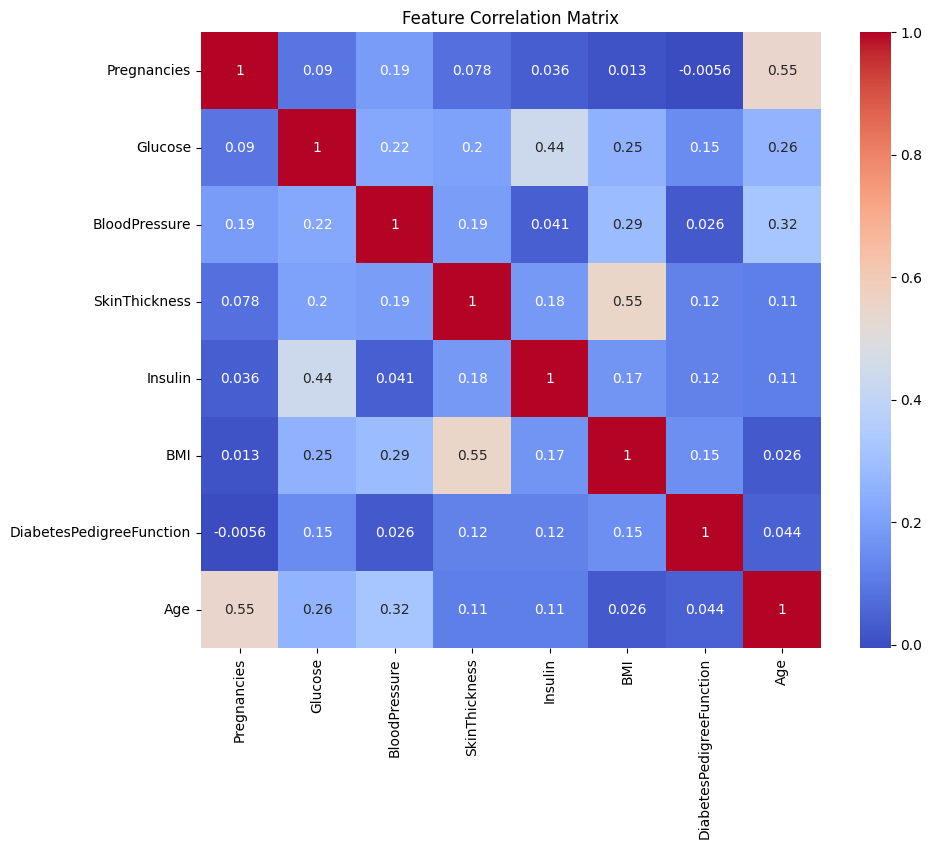

Transformed features saved as 'diabetes_transformed.csv'. Dropped columns: []
Resampled target saved as 'diabetes_resampled_outcome.csv'
Logistic Regression: Mean Weighted F1-Score = 0.742, Std = 0.040
KNN: Mean Weighted F1-Score = 0.797, Std = 0.051
Decision Tree: Mean Weighted F1-Score = 0.789, Std = 0.081
Random Forest: Mean Weighted F1-Score = 0.823, Std = 0.071
SVM: Mean Weighted F1-Score = 0.808, Std = 0.063


/tmp/ipython-input-19-2622148734.py:81: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(results.values(), labels=results.keys())


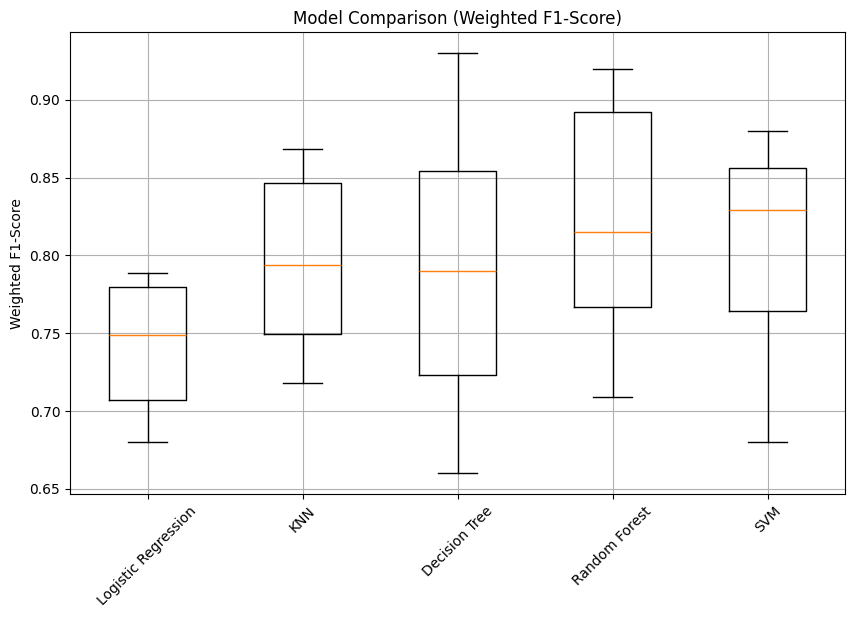

In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler # Import StandardScaler
from sklearn.model_selection import train_test_split # Import train_test_split - though not used here, good practice
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned dataset
df = pd.read_csv('diabetes_cleaned.csv')

# Split features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Handle class imbalance with SMOTE
# Apply SMOTE to the scaled features and the original target variable
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Convert X_resampled back to DataFrame for correlation analysis and column dropping
X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)

# Check correlation matrix
corr_matrix = X_resampled_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

# Remove highly correlated features (threshold > 0.8)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]
X_resampled_df = X_resampled_df.drop(to_drop, axis=1)

# Save transformed data (features only, target will be handled separately)
X_resampled_df.to_csv('diabetes_transformed.csv', index=False)

# Save the corresponding resampled target variable as well
# This is important because the resampled X has a different number of samples than the original y
y_resampled_df = pd.DataFrame(y_resampled, columns=['Outcome'])
y_resampled_df.to_csv('diabetes_resampled_outcome.csv', index=False)

print(f"Transformed features saved as 'diabetes_transformed.csv'. Dropped columns: {to_drop}")
print(f"Resampled target saved as 'diabetes_resampled_outcome.csv'")

# --- Model Evaluation Section ---
# Load the resampled features and target for model evaluation
X_resampled_eval = pd.read_csv('diabetes_transformed.csv')
y_resampled_eval = pd.read_csv('diabetes_resampled_outcome.csv')['Outcome'] # Load the resampled target

# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42)
}

# Evaluate models
results = {}
for name, model in models.items():
    # Use the correctly loaded and matched X and y for cross-validation
    scores = cross_val_score(model, X_resampled_eval, y_resampled_eval, cv=10, scoring='f1_weighted')
    results[name] = scores
    print(f"{name}: Mean Weighted F1-Score = {scores.mean():.3f}, Std = {scores.std():.3f}")

# Visualize results
plt.figure(figsize=(10, 6))
plt.boxplot(results.values(), labels=results.keys())
plt.title('Model Comparison (Weighted F1-Score)')
plt.xticks(rotation=45)
plt.ylabel('Weighted F1-Score') # Added y-axis label for clarity
plt.grid(True) # Added grid for better readability
plt.show()

## Nonlinear Machine Learning Algorithms

### k-Nearest Neighbors

## Classiffication and Regression Trees


## Support Vector Machines

# Spot-Check Regression Algorithms

- Linear Regression.
- Ridge Regression.
- LASSO Linear Regression.
- Elastic Net Regression.

Then looking at three nonlinear machine learning algorithms:
- k-Nearest Neighbors.
- Classification and Regression Trees.
- Support Vector Machines.

### Linear Regression
Linear regression assumes that the input variables have a Gaussian distribution. It is also
assumed that input variables are relevant to the output variable and that they are not highly
correlated with each other (a problem called collinearity). You can construct a linear regression
model using the LinearRegression class.

### Ridge Regression
Ridge regression is an extension of linear regression where the loss function is modified to
minimize the complexity of the model measured as the sum squared value of the coefficient
values (also called the L2-norm). You can construct a ridge regression model by using the Ridge
class2.

# Nonlinear Machine Learning Algorithms
This section provides examples of how to use three di


erent nonlinear machine learning algorithms
for regression in Python with scikit-learn.

### K-Nearest Neighbors
The k-Nearest Neighbors algorithm (or KNN) locates the k most similar instances in the
training dataset for a new data instance. From the k neighbors, a mean or median output
variable is taken as the prediction. Of note is the distance metric used (the metric argument).
The Minkowski distance is used by default, which is a generalization of both the Euclidean
distance (used when all inputs have the same scale) and Manhattan distance (for when the
scales of the input variables di


er). You can construct a KNN model for regression using the
KNeighborsRegressor class5.

# Compare Machine Learning Algorithms
It is important to compare the performance of multiple di


erent machine learning algorithms
consistently. In this chapter you will discover how you can create a test harness to compare
multiple different machine learning algorithms in Python with scikit-learn. You can use this
test harness as a template on your own machine learning problems and add more and different
algorithms to compare. After completing this lesson you will know:

1. How to formulate an experiment to directly compare machine learning algorithms.
2. A reusable template for evaluating the performance of multiple algorithms on one dataset.
3. How to report and visualize the results when comparing algorithm performance.


### Choose The Best Machine Learning Model
When you work on a machine learning project, you often end up with multiple good models
to choose from. Each model will have different performance characteristics. Using resampling
methods like cross validation, you can get an estimate for how accurate each model may be on
unseen data. You need to be able to use these estimates to choose one or two best models from
the suite of models that you have created.
When you have a new dataset, it is a good idea to visualize the data using different techniques
in order to look at the data from di


erent perspectives. The same idea applies to model selection.
You should use a number of di


erent ways of looking at the estimated accuracy of your machine
learning algorithms in order to choose the one or two algorithm to finalize. A way to do this is
to use visualization methods to show the average accuracy, variance and other properties of the
distribution of model accuracies. In the next section you will discover exactly how you can do
that in Python with scikit-learn.


### Compare Machine Learning Algorithms Consistently
The key to a fair comparison of machine learning algorithms is ensuring that each algorithm is
evaluated in the same way on the same data. You can achieve this by forcing each algorithm to be evaluated on a consistent test harness. In the example below six different classiffication
algorithms are compared on a single dataset:

- Logistic Regression.
- Linear Discriminant Analysis.
- k-Nearest Neighbors.
- Classiffication and Regression Trees.
- Naive Bayes.
- Support Vector Machines.

The dataset is the Pima Indians onset of diabetes problem. The problem has two classes and
eight numeric input variables of varying scales. The 10-fold cross validation procedure is used to
evaluate each algorithm, importantly con


gured with the same random seed to ensure that the
same splits to the training data are performed and that each algorithm is evaluated in precisely
the same way. Each algorithm is given a short name, useful for summarizing results afterward.

From these results, it would suggest that both logistic regression and linear discriminant analysis are perhaps worthy of further study on this problem.

# Chosen Model: Logistic Regression

- `Problem Representation:` Logistic regression is used for binary classification problems, where the goal is to predict one of two possible outcomes (e.g., spam or not spam, pass or fail). The output of logistic regression is a probability value between 0 and 1.

- `Linear Function:` In logistic regression, we first create a linear function by multiplying input features (x) with their corresponding weights (w) and adding a bias term (b). This is similar to linear regression but with a key difference in the next step.

>> Mathematically: z = w1 * x1 + w2 * x2 + ... + wn * xn + b

- `Sigmoid Function:` The linear function's output (z) is passed through the sigmoid function (also called the logistic function) to convert it into a probability value between 0 and 1. The sigmoid function has an S-shaped curve, which maps any real-valued number to a value between 0 and 1.

>> Sigmoid function: p = 1 / (1 + e^(-z))

- `Model Training:` To train the logistic regression model, we need to find the optimal weights (w) and bias (b) that minimize the error between predicted probabilities and the actual outcomes. This is done using a technique called gradient descent, which iteratively adjusts the weights and bias to minimize the cost function (e.g., cross-entropy loss).

- `Prediction and Decision Boundary:` Once the model is trained, it can be used to predict the probability of a given input belonging to a particular class. A decision boundary is set (typically at 0.5), and if the probability is greater than this threshold, the input is classified as one class; otherwise, it is classified as the other class.

## Cross Validation (Model Evaluation)

Cross-validation is a widely used technique in machine learning to assess the performance of a model and its ability to generalize to unseen data. It is important because it helps to address the issue of `overfitting`, where a model learns the training data too well and performs `poorly on new, unseen data`.

>> `Cross-validation provides a more accurate estimate of a model's performance on unseen data and reduces the risk of overfitting.`

The key idea behind cross-validation is to divide the dataset into multiple smaller subsets, called folds, and train and evaluate the model multiple times. Each time, the model is trained on a different combination of folds and tested on the remaining fold. This process is repeated until every fold has been used for testing exactly once. The performance of the model is then averaged across all iterations to provide a more reliable estimate of its performance.

Here are the main reasons why cross-validation is important in machine learning:

`More accurate performance estimation:` By evaluating the model on different subsets of data, cross-validation provides a better estimate of the model's performance on unseen data compared to a single train-test split.

`Reducing overfitting:` Overfitting occurs when a model learns the training data too well, including the noise, and fails to generalize to new data. Cross-validation can help detect overfitting by providing performance estimates on different data subsets, thus encouraging the selection of a model with better generalization ability.

`Model selection and hyperparameter tuning:` Cross-validation can be used to compare the performance of different models or to fine-tune the hyperparameters of a single model. By comparing cross-validation scores, you can select the model or hyperparameter configuration that performs best on average across different data subsets.

`Efficient use of data:` In situations where the available dataset is limited, cross-validation allows for more efficient use of the data by training and testing the model on different subsets, ensuring that the model's performance is assessed on the entire dataset.

One popular form of cross-validation is `k-fold cross-validation`, where the dataset is divided into k equal-sized folds. The model is then trained and tested k times, each time using a different fold for testing and the remaining k-1 folds for training. Other variants of cross-validation include stratified k-fold, which preserves the class distribution in each fold, and leave-one-out cross-validation, where each sample is used as a test set exactly once.

## Model Evaluation (Cross Validation)

Evaluating if a model is `overfitting` based on `cross-validation (CV)` scores and training scores involves comparing the model's performance on the training set and the cross-validation set. Here's a simple guideline to interpret these scores:

- If the training score is high and the CV score is also high, the model is likely performing well and generalizing effectively to unseen data. This indicates a good balance between bias and variance.

- If the training score is high, but the CV score is significantly lower, the model is likely overfitting. Overfitting occurs when the model captures the noise in the training data and is unable to generalize well to new, unseen data. In this case, you should consider simplifying the model (e.g., using regularization, reducing the number of features, or using a less complex model) or increasing the size of the training set.

- If both the training score and CV score are low, the model is likely underfitting. This occurs when the model is too simple to capture the underlying patterns in the data. To address underfitting, you can try using a more complex model, adding more features, or fine-tuning the model's hyperparameters.

`It's important to note that comparing the absolute values of the scores may not always be informative.`
 Instead, look at the `relative difference between the training and CV scores to assess if the model is overfitting.` A large gap between the two scores is indicative of overfitting, while a smaller gap suggests a better balance between bias and variance.

>> Keep in mind that cross-validation provides a more robust evaluation of model performance than a single train-test split. By training and evaluating the model on different subsets of the data, cross-validation helps to reduce the risk of overfitting and provides a better estimate of the model's generalization ability.

# First Individual Project Assignment:-

You are a lead data scientist on a project regarding maternal health, you are provided with a dataset regarding featal health. (Please find the dataset in the data folder given). These are your instructions
1 - Use that dataset to do: EDA, Clean the data
2 - Use mandas Profiling to export a pdf report of your data (explain how the report informs your future decisions)
3 - Apply any needed transformations if possible.
4 - Choose a proper evaluation metric for your project.
5 - Do model spot checking to find the best model for your use.
6 - Build the chosen model
7 - Evaluate bias vs variance on your model and present your results.

Note:
- Please follow instructions!
- You have to explain in detail every step you are executing in your own words, your result will be based on how well you explain what steps you are executing.
- Students are allowed to use public resources off the internet for their research, however students are not allowed to copy and paste code for this assignment (If you are caught, you will fail this assignment, you have been warned: especially chatGpt.)
- This is a graded individual assignment any malpractice will lead to losing of points, this assignment contributes a great percentage to your final grade.
- All assignments must be handed in by Close of Business next Wednesday by 6:00PM Date: 3rd - May - 2023
- All your assignments will be handed in by means of a pull request to my original repository.
- Please name your pull requests as per previously instructed, you will not get warnings for failing to do this.
- Your work should be saved in the Project Folder (Create your own folder and give the folder your name.)


# Automate Machine Learning Workflows with Pipelines
---

<img src="https://www.wordstream.com/wp-content/uploads/2021/07/machine-learning.png">

---

There are standard workflows in a machine learning project that can be automated. In Python
scikit-learn, Pipelines help to clearly define and automate these work
ows. In this chapter you will discover Pipelines in scikit-learn and how you can automate common machine learning
work
ows. After completing this lesson you will know:

1. How to use pipelines to minimize data leakage.
2. How to construct a data preparation and modeling pipeline.
3. How to construct a feature extraction and modeling pipeline.

### Automating Machine Learning Workflows
There are standard work
ows in applied machine learning. Standard because they overcome
common problems like data leakage in your test harness. Python scikit-learn provides a Pipeline
utility to help automate machine learning work
ows. Pipelines work by allowing for a linear
sequence of data transforms to be chained together culminating in a modeling process that can
be evaluated.

The goal is to ensure that all of the steps in the pipeline are constrained to the data available
for the evaluation, such as the training dataset or each fold of the cross validation procedure.

### Data Preparation and Modeling Pipeline
An easy trap to fall into in applied machine learning is leaking data from your training dataset
to your test dataset. To avoid this trap you need a robust test harness with strong separation of training and testing. This includes data preparation. Data preparation is one easy way to leak
knowledge of the whole training dataset to the algorithm. For example, preparing your data
using normalization or standardization on the entire training dataset before learning would not
be a valid test because the training dataset would have been in
uenced by the scale of the data
in the test set.


Pipelines help you prevent data leakage in your test harness by ensuring that data preparation
like standardization is constrained to each fold of your cross validation procedure. The example
below demonstrates this important data preparation and model evaluation work
ow on the Pima Indians onset of diabetes dataset. The pipeline is defined with two steps:

1. Standardize the data.
2. Learn a Linear Discriminant Analysis model.

The pipeline is then evaluated using 10-fold cross validation.

Notice how we create a Python list of steps that are provided to the Pipeline for process
the data. Also notice how the Pipeline itself is treated like an estimator and is evaluated in its
entirety by the k-fold cross validation procedure. Running the example provides a summary of
accuracy of the setup on the dataset.


## Feature Extraction and Modeling Pipeline
Feature extraction is another procedure that is susceptible to data leakage. Like data preparation,
feature extraction procedures must be restricted to the data in your training dataset. The
pipeline provides a handy tool called the FeatureUnion which allows the results of multiple
feature selection and extraction procedures to be combined into a larger dataset on which a
model can be trained. Importantly, all the feature extraction and the feature union occurs
within each fold of the cross validation procedure. The example below demonstrates the pipeline
defined with four steps:

1. Feature Extraction with Principal Component Analysis (3 features).
2. Feature Extraction with Statistical Selection (6 features).
3. Feature Union.
4. Learn a Logistic Regression Model.

The pipeline is then evaluated using 10-fold cross validation.

# Improve Performance with Ensembles

Ensembles can give you a boost in accuracy on your dataset. In this chapter you will discover
how you can create some of the most powerful types of ensembles in Python using scikit-learn.
This lesson will step you through Boosting, Bagging and Majority Voting and show you how you
can continue to ratchet up the accuracy of the models on your own datasets. After completing
this lesson you will know:

1. How to use bagging ensemble methods such as bagged decision trees, random forest and extra trees.
2. How to use boosting ensemble methods such as AdaBoost and stochastic gradient boosting.
3. How to use voting ensemble methods to combine the predictions from multiple algorithms.

### Combine Models Into Ensemble Predictions
The three most popular methods for combining the predictions from different models are:

- Bagging. Building multiple models (typically of the same type) from different subsamples of the training dataset.
- Boosting. Building multiple models (typically of the same type) each of which learns to fix the prediction errors of a prior model in the sequence of models.
- Voting. Building multiple models (typically of di


ering types) and simple statistics (like calculating the mean) are used to combine predictions.

This assumes you are generally familiar with machine learning algorithms and ensemble
methods and will not go into the details of how the algorithms work or their parameters.
The Pima Indians onset of Diabetes dataset is used to demonstrate each algorithm. Each
ensemble algorithm is demonstrated using 10-fold cross validation and the classiffication accuracy
performance metric.


### Bagging Algorithms
Bootstrap Aggregation (or Bagging) involves taking multiple samples from your training dataset
(with replacement) and training a model for each sample. The


nal output prediction is averaged
across the predictions of all of the sub-models. The three bagging models covered in this section
are as follows:

- Bagged Decision Trees.
- Random Forest.
- Extra Trees.

### Bagged Decision Trees
Bagging performs best with algorithms that have high variance. A popular example are
decision trees, often constructed without pruning. In the example below is an example
of using the BaggingClassifier with the Classi


cation and Regression Trees algorithm
(DecisionTreeClassifier1). A total of 100 trees are created.

### Random Forest
Random Forests is an extension of bagged decision trees. Samples of the training dataset are
taken with replacement, but the trees are constructed in a way that reduces the correlation
between individual classiffiers. Specifically, rather than greedily choosing the best split point in
the construction of each tree, only a random subset of features are considered for each split. You
can construct a Random Forest model for classiffication using the RandomForestClassifier
class2. The example below demonstrates using Random Forest for classiffication with 100 trees
and split points chosen from a random selection of 3 features.

### Extra Trees
Extra Trees are another modi


cation of bagging where random trees are constructed from
samples of the training dataset. You can construct an Extra Trees model for classiffication using
the ExtraTreesClassifier class3. The example below provides a demonstration of extra trees
with the number of trees set to 100 and splits chosen from 7 random features.

# Boosting Algorithms
Boosting ensemble algorithms creates a sequence of models that attempt to correct the mistakes
of the models before them in the sequence. Once created, the models make predictions which
may be weighted by their demonstrated accuracy and the results are combined to create a


nal
output prediction. The two most common boosting ensemble machine learning algorithms are:

- AdaBoost.
- Stochastic Gradient Boosting.


### AdaBoost
AdaBoost was perhaps the


rst successful boosting ensemble algorithm. It generally works
by weighting instances in the dataset by how easy or dicult they are to classify, allowing
the algorithm to pay or less attention to them in the construction of subsequent models. You
can construct an AdaBoost model for classi


cation using the AdaBoostClassifier class4. The
example below demonstrates the construction of 30 decision trees in sequence using the AdaBoost
algorithm.

## Stochastic Gradient Boosting
Stochastic Gradient Boosting (also called Gradient Boosting Machines) are one of the most
sophisticated ensemble techniques. It is also a technique that is proving to be perhaps one of
the best techniques available for improving performance via ensembles. You can construct a
Gradient Boosting model for classiffication using the GradientBoostingClassifier class5. The
example below demonstrates Stochastic Gradient Boosting for classi


cation with 100 trees.

## XGB

### Voting Ensemble
Voting is one of the simplest ways of combining the predictions from multiple machine learning
algorithms. It works by first creating two or more standalone models from your training dataset.
A Voting Classiffier can then be used to wrap your models and average the predictions of the
sub-models when asked to make predictions for new data. The predictions of the sub-models can
be weighted, but specifying the weights for classiffiers manually or even heuristically is difficult.
More advanced methods can learn how to best weight the predictions from sub-models, but this
is called stacking (stacked aggregation) and is currently not provided in scikit-learn.
You can create a voting ensemble model for classiffication using the VotingClassifier
class6. The code below provides an example of combining the predictions of logistic regression,
classiffication and regression trees and support vector machines together for a classiffication
problem.

## Finalize Your Model with pickle
Pickle is the standard way of serializing objects in Python. You can use the pickle1 operation
to serialize your machine learning algorithms and save the serialized format to a file. Later you
can load this file to deserialize your model and use it to make new predictions. The example
below demonstrates how you can train a logistic regression model on the Pima Indians onset of
diabetes dataset, save the model to file and load it to make predictions on the unseen test set.

## Finalize Your Model with Joblib
The Joblib2 library is part of the SciPy ecosystem and provides utilities for pipelining Python
jobs. It provides utilities for saving and loading Python objects that make use of NumPy data
structures, efficiently3. This can be useful for some machine learning algorithms that require a
lot of parameters or store the entire dataset (e.g. k-Nearest Neighbors). The example below
demonstrates how you can train a logistic regression model on the Pima Indians onset of diabetes
dataset, save the model to file using Joblib and load it to make predictions on the unseen test
set.

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
import pandas as pd
import joblib

# Load the transformed features and the resampled target variable
# These were saved in the previous cell after the first SMOTE application
X_resampled_df = pd.read_csv('diabetes_transformed.csv')
y_resampled = pd.read_csv('diabetes_resampled_outcome.csv')['Outcome'] # Load the resampled target

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None]
}

# Perform grid search on the already resampled data
rf = RandomForestClassifier(random_state=42)
# Use the already resampled X and y directly for grid search fitting
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='f1_weighted')
grid_search.fit(X_resampled_df, y_resampled)

# Best model
best_rf = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Save model
joblib.dump(best_rf, 'random_forest_diabetes.pkl')
print("Model saved as 'random_forest_diabetes.pkl'")

Best Parameters: {'max_depth': None, 'n_estimators': 200}
Model saved as 'random_forest_diabetes.pkl'


Training Weighted F1-Score: 1.000
CV Weighted F1-Score: 0.825, Std: 0.070


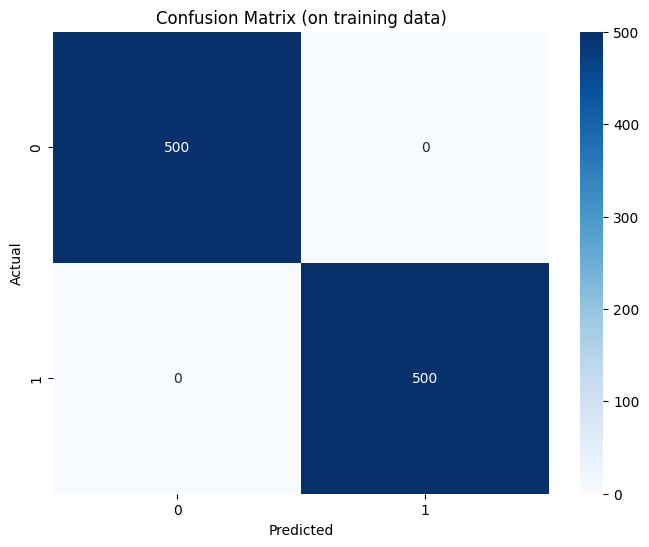

In [23]:
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# from imblearn.over_sampling import SMOTE

# Load transformed dataset (features) and the corresponding resampled target variable
X_resampled_df = pd.read_csv('diabetes_transformed.csv')
# Load the target variable that matches the resampled features
y_resampled = pd.read_csv('diabetes_resampled_outcome.csv')['Outcome']

# Remove the line attempting to re-apply SMOTE
# smote = SMOTE(random_state=42)
# X_resampled, y_resampled = smote.fit_resample(X_resampled_df, y_resampled)

# Load the best model
best_rf = joblib.load('random_forest_diabetes.pkl')

# Training score - Use the loaded resampled data directly
y_train_pred = best_rf.predict(X_resampled_df) # Use X_resampled_df
train_f1 = f1_score(y_resampled, y_train_pred, average='weighted')
print(f"Training Weighted F1-Score: {train_f1:.3f}")

# Cross-validation score - Use the loaded resampled data directly
cv_scores = cross_val_score(best_rf, X_resampled_df, y_resampled, cv=10, scoring='f1_weighted') # Use X_resampled_df and y_resampled
print(f"CV Weighted F1-Score: {cv_scores.mean():.3f}, Std: {cv_scores.std():.3f}")

# Confusion matrix - Use the loaded resampled data directly for prediction
cm = confusion_matrix(y_resampled, y_train_pred) # Use y_resampled for the actual values
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (on training data)') # Clarify title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Template Summary
Below is the project template that you can use in your machine learning projects in Python.

In [ ]:
# Python Project Template
# 1. Prepare Problem
# a) Load libraries
# b) Load dataset

# 2. Summarize Data
# a) Descriptive statistics
# b) Data visualizations

# 3. Prepare Data
# a) Data Cleaning
# b) Feature Selection
# c) Data Transforms

# 4. Evaluate Algorithms
# a) Split-out validation dataset
# b) Test options and evaluation metric
# c) Spot Check Algorithms
# d) Compare Algorithms

# 5. Improve Accuracy
# a) Algorithm Tuning
# b) Ensembles

# 6. Finalize Model
# a) Predictions on validation dataset
# b) Create standalone model on entire training dataset
# c) Save model for later use